# 6.5 Task Unsupervised Machine Learning Clustering

## Script Contents
### 1. Import Libraries
### 2. Elbow Technique
### 3. K-means Clustering

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# assign path

path = r'C:\Users\X1\House Sales Analysis Master'

In [4]:
# Import House Sales dataset

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','house_data_cleaned1.csv'), index_col = False)

In [5]:
# Show all columns

pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category
0,1999700045,2014-05-02,313000,3,1.50,1340,7912,1.5,0,0,3,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940,High price
1,1860600135,2014-05-02,2380000,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400,High price
2,5467900070,2014-05-02,342000,3,2.00,1930,11947,1.0,0,0,4,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,High price
3,4040800810,2014-05-02,420000,3,2.25,2000,8030,1.0,0,0,4,8,1000,1000,1963,0,98008,47.6188,-122.114,2070,8250,High price
4,7197300105,2014-05-02,550000,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,High price


In [6]:
# Drop unnecessary columns

df1 = df.drop(columns = ['id', 'date', 'Price category'])
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,313000,3,1.50,1340,7912,1.5,0,0,3,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940
1,2380000,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400
2,342000,3,2.00,1930,11947,1.0,0,0,4,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825
3,420000,3,2.25,2000,8030,1.0,0,0,4,8,1000,1000,1963,0,98008,47.6188,-122.114,2070,8250
4,550000,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500


# 2. Elbow Technique

In [7]:
# Defines the range of potential clusters in the data.

num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [8]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 
score

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

[-2968236099539830.5,
 -1407391326012042.5,
 -783923639364891.8,
 -513271436200247.44,
 -376861708895983.75,
 -290137187026474.4,
 -231817099871008.5,
 -188263327655558.28,
 -162866389206293.28]

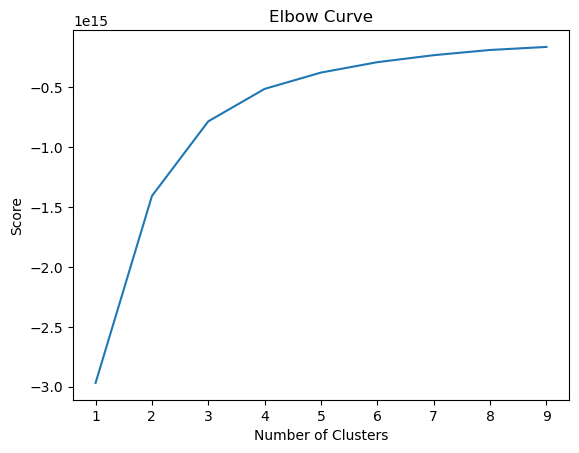

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The optimal count for clusters is three or four since there is a large jump from two to three and a noticeable jump from three to four.  We'll use four for k-means clustering, as after four is when the curve starts to flatten out.

# 3. K-means Clustering

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\X1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,clusters
0,313000,3,1.50,1340,7912,1.5,0,0,3,7,1340,0,1955,0,98133,47.7658,-122.339,1480,7940,2
1,2380000,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400,1
2,342000,3,2.00,1930,11947,1.0,0,0,4,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,2
3,420000,3,2.25,2000,8030,1.0,0,0,4,8,1000,1000,1963,0,98008,47.6188,-122.114,2070,8250,2
4,550000,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,0


In [14]:
df1['clusters'].value_counts()

clusters
2    12929
0     7257
3     1227
1      190
Name: count, dtype: int64

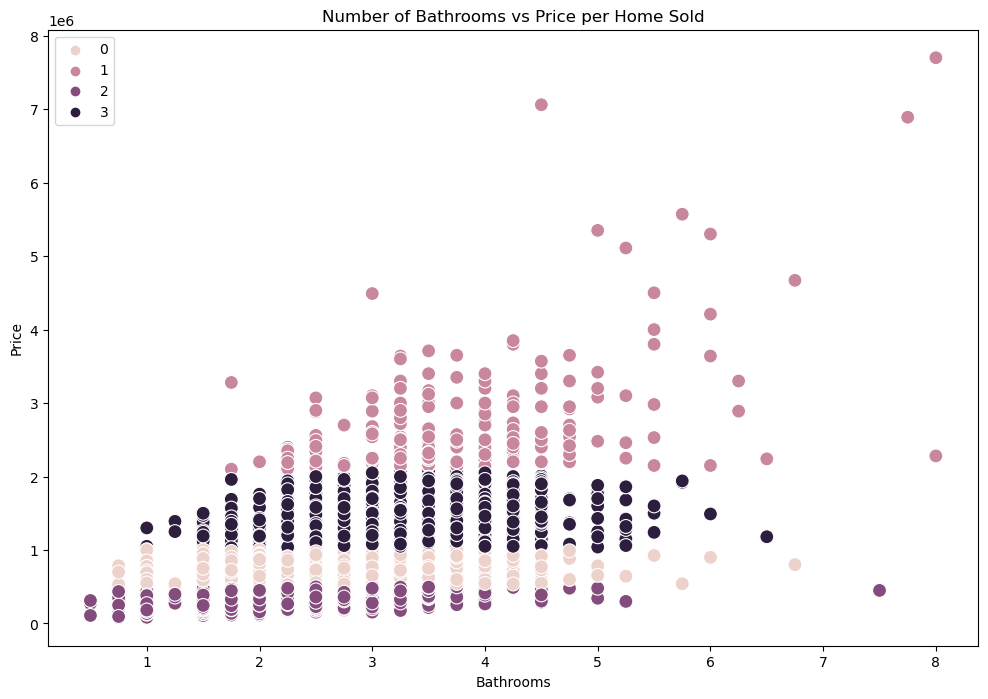

In [15]:
# Plot the clusters for the "price" and "bathrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['bathrooms'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('Number of Bathrooms vs Price per Home Sold') 
plt.xlabel('Bathrooms') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### My original hypothesis "Having more bathrooms correlates to higher prices" is proven inaccurate here.
### We can see that buying a home in cluster three (black) is more expensive than buying a home in cluster two (purple) even though you can get the same number of bathrooms (between one and five bathrooms).

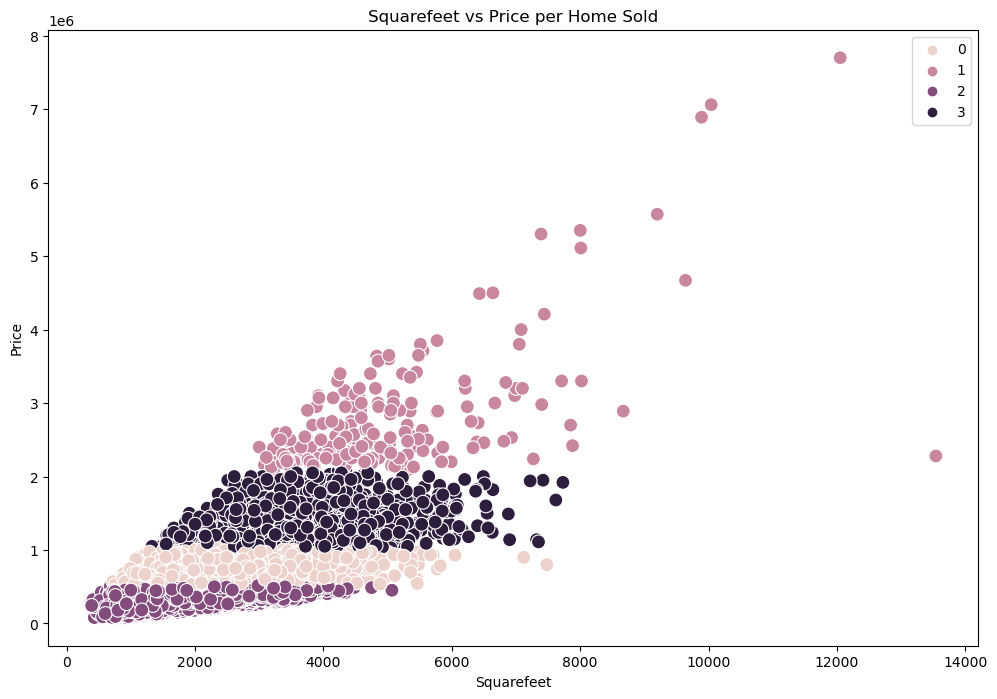

In [16]:
# Plot the clusters for the "price" and "squarefeet" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['sqft_living'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('Squarefeet vs Price per Home Sold') 
plt.xlabel('Squarefeet') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Here we can see a trend of having more squarefeet corellates to higher price.

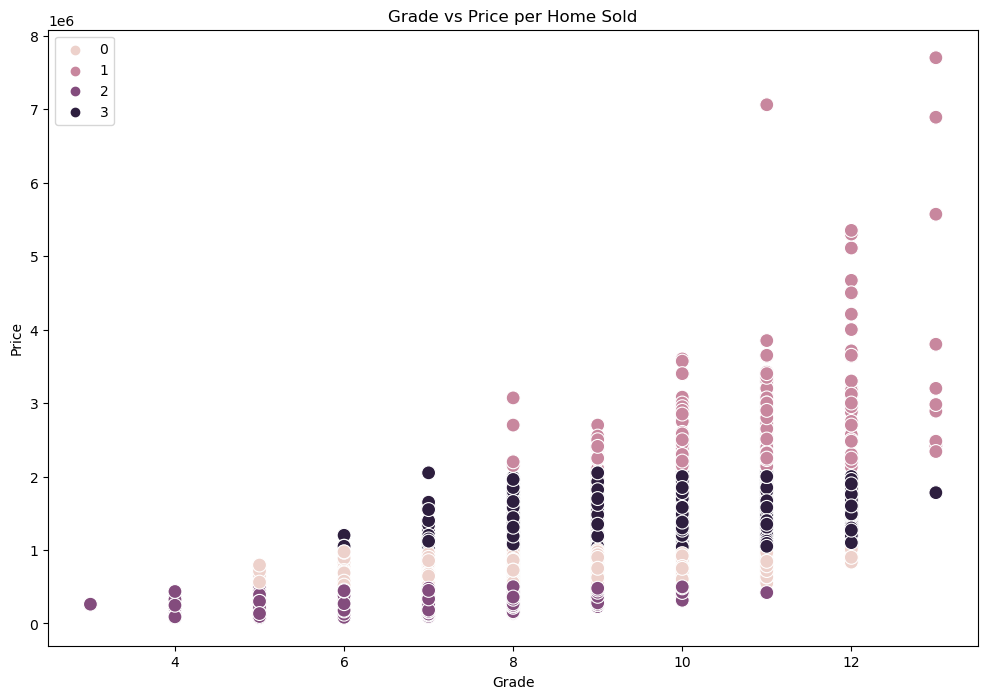

In [17]:
# Plot the clusters for the "price" and "grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['grade'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('Grade vs Price per Home Sold') 
plt.xlabel('Grade') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### When comparing the grade of a house, you can get a decently high grade unit for a low price, as seen in cluster two (purple) or cluster zero (light pink).

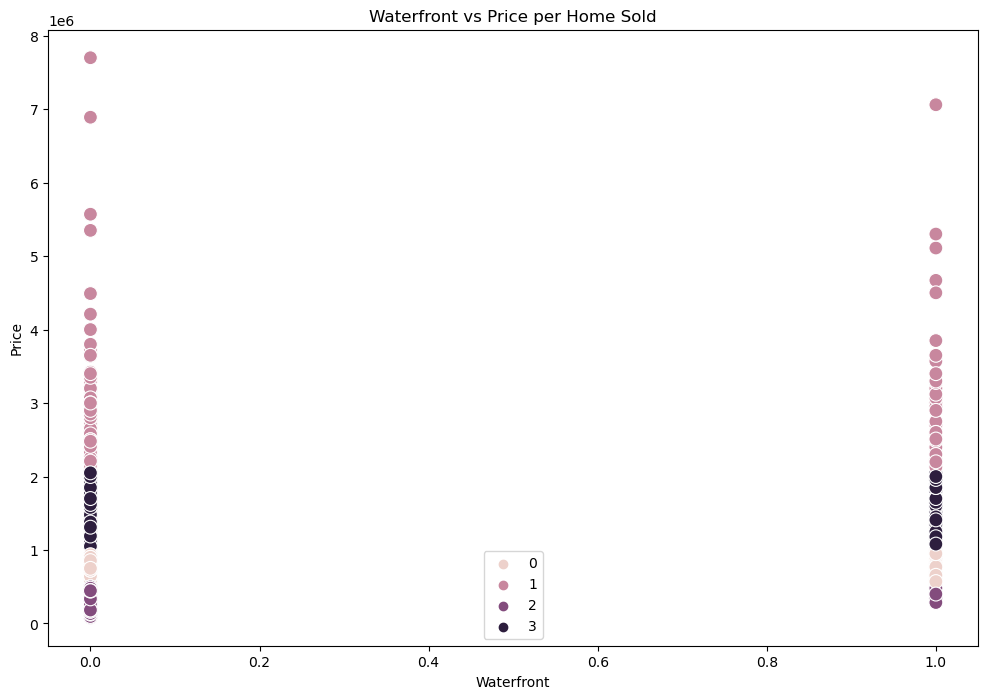

In [18]:
# Plot the clusters for the "price" and "bathrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['waterfront'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.title('Waterfront vs Price per Home Sold') 
plt.xlabel('Waterfront') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Looking at the year the house was initially built, there is not much price difference in buying an older house versus a newer house. This means older houses are valued the same as newer houses.
### In all plots, each cluster can be identified as a different price point. 

#### Group each cluster

In [19]:
df1.loc[df1['clusters'] == 3, 'cluster'] = 'black'
df1.loc[df1['clusters'] == 2, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'pink'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'light pink'

In [20]:
df1.groupby('cluster').agg({'bathrooms':['mean', 'median'], 
                         'sqft_living':['mean', 'median'], 
                         'grade':['mean', 'median'],
                          'waterfront':['mean', 'median'],
                           'price':['mean', 'median']})

bathrooms         sqft_living              grade        waterfront  \
                mean median         mean  median       mean median       mean   
cluster                                                                         
black       3.077832   3.00  3631.536267  3530.0   9.637327   10.0   0.048085   
light pink  2.362615   2.50  2456.488769  2400.0   8.187956    8.0   0.006063   
pink        3.873684   3.75  5094.152632  4730.0  10.752632   11.0   0.236842   
purple      1.860024   1.75  1677.313172  1600.0   7.126383    7.0   0.001160   

                          price             
           median          mean     median  
cluster                                     
black         0.0  1.360562e+06  1300000.0  
light pink    0.0  6.893826e+05   660000.0  
pink          0.0  2.807000e+06  2530000.0  
purple        0.0  3.453381e+05   345000.0

### The pink cluster has best stats overall in each category, however has the highest prices.
### Year built doesn't influence price significantly.
### Looking at only these variables, the best cluster per price is the black cluster since it has a higher mean all categories than purple and light pink, plus it is about half the median price compared to pink.

### In future analysis, these steps can be used to predict future house prices, as well as determine how much each category is worth.